Cargando la BD [MNIST](https://http://yann.lecun.com/exdb/mnist/) en Keras

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

Información sobre los datos de entrenamiento

In [ ]:
train_images.shape

(60000, 28, 28)

In [ ]:
len(train_labels)

60000

In [ ]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

Información sobre los datos de prueba

In [ ]:
test_images.shape

(10000, 28, 28)

In [ ]:
len(test_labels)

10000

In [ ]:
test_labels

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

Arquitectura de la red

In [ ]:
from tensorflow.keras import models
from tensorflow.keras import layers
model = models.Sequential([
  layers.Dense(512, activation='relu'),
  layers.Dense(10, activation='softmax')
])

Definición de optimizador, función de pérdida y métrica

In [ ]:
model.compile(optimizer='rmsprop',
  loss='sparse_categorical_crossentropy',
  metrics=['accuracy'])

Preparando los datos

In [ ]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

Entrenando la red

In [ ]:
history = model.fit(x=train_images, y=train_labels, batch_size=32, epochs=10, verbose=1, validation_split=0.1, shuffle=True)
model.summary()

Epoch 1/10
1688/1688 [==============================] - 7s 3ms/step - loss: 0.2146 - accuracy: 0.9359 - val_loss: 0.0989 - val_accuracy: 0.9730
Epoch 2/10
1688/1688 [==============================] - 6s 3ms/step - loss: 0.0885 - accuracy: 0.9737 - val_loss: 0.0852 - val_accuracy: 0.9758
Epoch 3/10
1688/1688 [==============================] - 5s 3ms/step - loss: 0.0618 - accuracy: 0.9811 - val_loss: 0.0686 - val_accuracy: 0.9815
Epoch 4/10
1688/1688 [==============================] - 5s 3ms/step - loss: 0.0453 - accuracy: 0.9862 - val_loss: 0.0787 - val_accuracy: 0.9808
Epoch 5/10
1688/1688 [==============================] - 5s 3ms/step - loss: 0.0341 - accuracy: 0.9896 - val_loss: 0.0812 - val_accuracy: 0.9818
Epoch 6/10
1688/1688 [==============================] - 6s 3ms/step - loss: 0.0261 - accuracy: 0.9921 - val_loss: 0.0907 - val_accuracy: 0.9800
Epoch 7/10
1688/1688 [==============================] - 5s 3ms/step - loss: 0.0201 - accuracy: 0.9939 - val_loss: 0.0786 - val_accuracy:

Hacer algunas predicciones (probabilidad de que sea un digito 0-9)

In [ ]:
test_digits = test_images[0:10]
predictions = model.predict(test_digits)
predictions[0]
print(predictions)

1/1 [==============================] - 0s 45ms/step
[[2.20115180e-12 8.81839596e-16 1.17200633e-11 1.14309671e-06
  8.95252367e-22 1.18829276e-13 3.51999884e-21 9.99998808e-01
  6.44525962e-15 1.34527681e-10]
 [5.66525620e-15 2.88036595e-10 1.00000000e+00 3.04722892e-12
  1.11809939e-21 1.35766676e-14 4.64972672e-14 2.43718932e-24
  7.72372888e-13 3.27280138e-22]
 [3.66735953e-09 9.99997973e-01 8.96706013e-07 8.54616863e-11
  1.67492786e-07 3.99643163e-09 3.58504707e-07 3.78993178e-07
  1.24894797e-07 4.57225334e-11]
 [1.00000000e+00 9.13680041e-16 3.63766656e-10 1.94236012e-12
  1.66190033e-14 5.04500830e-10 1.65457947e-09 1.23675759e-09
  1.29728853e-16 4.91925667e-10]
 [9.95087901e-11 1.38497585e-13 2.34411934e-11 3.35856420e-15
  9.99877930e-01 4.35291926e-14 2.62755338e-11 3.38416073e-09
  6.28657673e-12 1.22073281e-04]
 [2.04761676e-11 9.99999642e-01 2.02104666e-10 3.35980918e-13
  6.62706379e-09 3.30498161e-14 2.23692263e-11 3.55778553e-07
  5.46063368e-11 8.86327090e-13]
 [1.10

Verificación del dígito

In [ ]:
test_labels[0]

7

Verificar sobreajuste

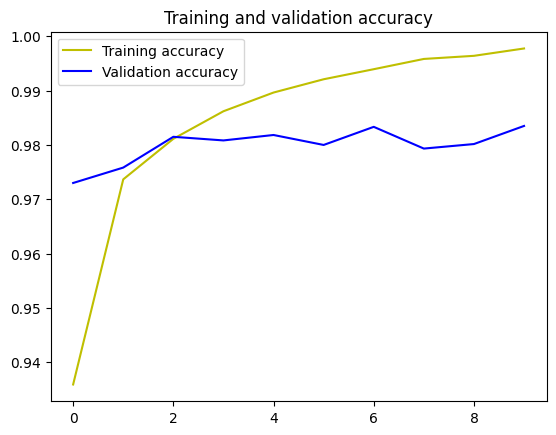

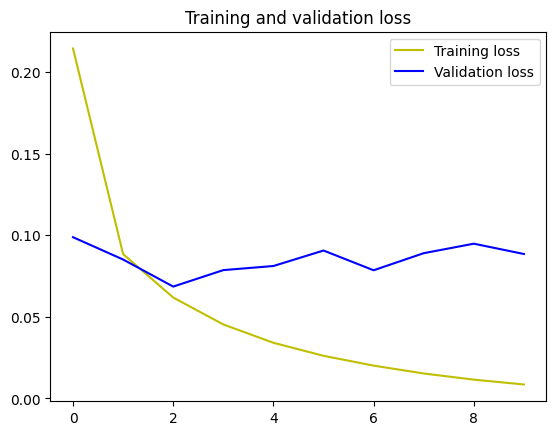

In [ ]:
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]

plt.plot(accuracy, "y", label="Training accuracy")
plt.plot(val_accuracy, "b", label="Validation accuracy")

plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(loss, "y", label="Training loss")
plt.plot(val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

Evaluando la red

In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('test_acc: ', test_acc)
print('test_loss: ',test_loss)

313/313 [==============================] - 1s 2ms/step - loss: 0.0759 - accuracy: 0.9838
test_acc:  0.9837999939918518
test_loss:  0.07589998096227646


Cálculo de la matriz de confusion

313/313 [==============================] - 0s 1ms/step


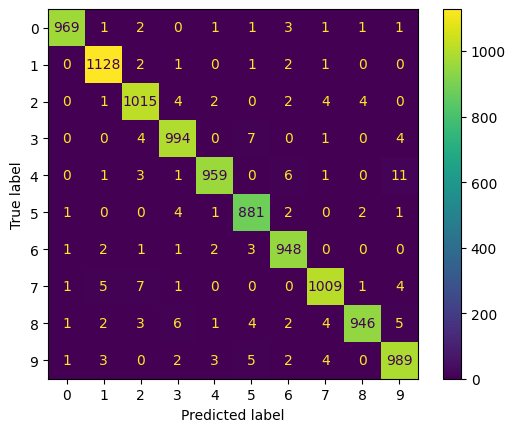

In [ ]:
test_predictions = model.predict(test_images)
cm = confusion_matrix(test_labels, test_predictions.argmax(axis=1))
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

Algunas métricas

In [ ]:
from sklearn.metrics import precision_recall_fscore_support
train_labelsOut=model.predict(train_images)
print(precision_recall_fscore_support(train_labels,np.argmax(train_labelsOut,axis=1),average=None,labels=[0,1,2,3,4,5,6,7,8,9]))

1875/1875 [==============================] - 3s 2ms/step
(array([0.99966153, 0.9955641 , 0.99748575, 0.99609121, 0.99931236,
       0.99576427, 0.99579125, 0.99840256, 0.99879497, 0.99430104]), array([0.99729867, 0.99866508, 0.99882511, 0.99755342, 0.99503595,
       0.99741745, 0.99949307, 0.99760575, 0.99162536, 0.99714238]), array([0.9984787 , 0.99711218, 0.99815498, 0.99682177, 0.99716957,
       0.99659018, 0.99763872, 0.99800399, 0.99519726, 0.99571968]), array([5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]))


Cargar de nuevo la BD y visualizar el dígito de la predicción

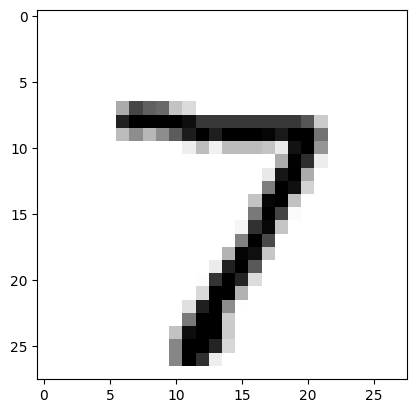

In [ ]:
from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

digit = test_images[0]
import matplotlib.pyplot as plt
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

Ejercicios:
----------
1. Cambie el batch_size ¿Qué observa? ¿Qué sucede si cambia su valor?
2. ¿Mejora la precisión (**accuracy**) si aumenta las pasadas (**epoch**)? ¿Por qué?
